In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn import metrics
% matplotlib inline

/Users/ds/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv('../csv_creation/final_data.csv', encoding='utf-8')

/Users/ds/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.drop('Unnamed: 0', 1, inplace=True)

In [4]:
df.head()

,campaign_handle,ch,chamber,name,party,screen_name,source,state,text,time_created,type
0,NaN,yes,senate,Kamala Harris,D,KamalaHarris,Sprout Social,CA,No public hearings. \nNo debate. \nNo text.\nN...,2017-06-21T00:33:01-04:00,member
1,NaN,yes,house,Ted Lieu,D,tedlieu,Twitter for Android,CA,Why should world leaders trust or listen to US...,2017-06-21T00:02:47-04:00,member
2,NaN,yes,house,Jerrold Nadler,D,JerryNadler,Twitter for iPhone,NY,Congratulations to Jon @ossoff and #GADems on ...,2017-06-21T02:00:22-04:00,member
3,NaN,yes,house,Tulsi Gabbard,D,TulsiGabbard,Twitter for iPhone,HI,Join me in celebrating the gift of yoga on thi...,2017-06-21T01:39:55-04:00,member
4,NaN,yes,house,Jerrold Nadler,D,JerryNadler,Twitter for iPhone,NY,#GA06 is #GOP stronghold &amp; @ossoff nearly ...,2017-06-21T02:13:27-04:00,member


In [5]:
model_data = pd.read_csv("../sampling_labelling/final_data/FINAL-fully-manual.csv", encoding='utf-8')

In [6]:
model_data.head()

,tweet,scores,sentiment
0,Families caught in the grip of the opioid cris...,"{u'neg': 0.376, u'neu': 0.624, u'pos': 0.0, u'...",1
1,Wisconsin needs action from Washington to comb...,"{u'neg': 0.356, u'neu': 0.644, u'pos': 0.0, u'...",1
2,I'm heartbroken to see WV families &amp; towns...,"{u'neg': 0.323, u'neu': 0.562, u'pos': 0.115, ...",1
3,#SmoggySkiesAct allows corporate polluters to ...,"{u'neg': 0.453, u'neu': 0.547, u'pos': 0.0, u'...",1
4,#Fakenews that was true:\n\nFlynn lied to VP\n...,"{u'neg': 0.341, u'neu': 0.574, u'pos': 0.085, ...",2


In [7]:
X = model_data.tweet
y = model_data.sentiment

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [9]:
vect = CountVectorizer(ngram_range=(1,2), max_df=0.35, strip_accents='unicode', lowercase=True)

In [10]:
nb = MultinomialNB(alpha=0.8)

In [11]:
X_train_dtm = vect.fit_transform(X_train)

In [12]:
X_test_dtm = vect.transform(X_test)

In [13]:
nb.fit(X_train_dtm, y_train)

MultinomialNB(alpha=0.8, class_prior=None, fit_prior=True)

In [14]:
y_pred_class = nb.predict(X_test_dtm)

In [15]:
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred_class))

('Accuracy: ', 0.66333333333333333)


In [16]:
tweets = []
for x in df.text:
    tweets.append(x)

In [17]:
len(tweets)

83147

In [18]:
total_dtm = vect.transform(df['text'].values.astype('U'))

In [19]:
len(vect.get_feature_names())

55270

In [20]:
results = nb.predict(total_dtm)

In [21]:
len(results)

83147

In [22]:
df['sentiment'] = results

In [23]:
df.head()

,campaign_handle,ch,chamber,name,party,screen_name,source,state,text,time_created,type,sentiment
0,NaN,yes,senate,Kamala Harris,D,KamalaHarris,Sprout Social,CA,No public hearings. \nNo debate. \nNo text.\nN...,2017-06-21T00:33:01-04:00,member,1
1,NaN,yes,house,Ted Lieu,D,tedlieu,Twitter for Android,CA,Why should world leaders trust or listen to US...,2017-06-21T00:02:47-04:00,member,2
2,NaN,yes,house,Jerrold Nadler,D,JerryNadler,Twitter for iPhone,NY,Congratulations to Jon @ossoff and #GADems on ...,2017-06-21T02:00:22-04:00,member,3
3,NaN,yes,house,Tulsi Gabbard,D,TulsiGabbard,Twitter for iPhone,HI,Join me in celebrating the gift of yoga on thi...,2017-06-21T01:39:55-04:00,member,3
4,NaN,yes,house,Jerrold Nadler,D,JerryNadler,Twitter for iPhone,NY,#GA06 is #GOP stronghold &amp; @ossoff nearly ...,2017-06-21T02:13:27-04:00,member,2


In [24]:
sent_labels = []
for x in df.sentiment:
    if x == 1:
        sent_labels.append(-1)
    elif x == 2:
        sent_labels.append(0)
    else:
        sent_labels.append(1)

In [26]:
df['mean_sentiment'] = sent_labels

In [30]:
party_sentiment = df.groupby('party').mean_sentiment.mean()

In [31]:
party_sentiment = pd.DataFrame(party_sentiment)

In [33]:
party_sentiment.sort_values('mean_sentiment', inplace=True)
party_sentiment.head()

,mean_sentiment
party,
I,-0.164474
D,-0.064009
R,0.210275


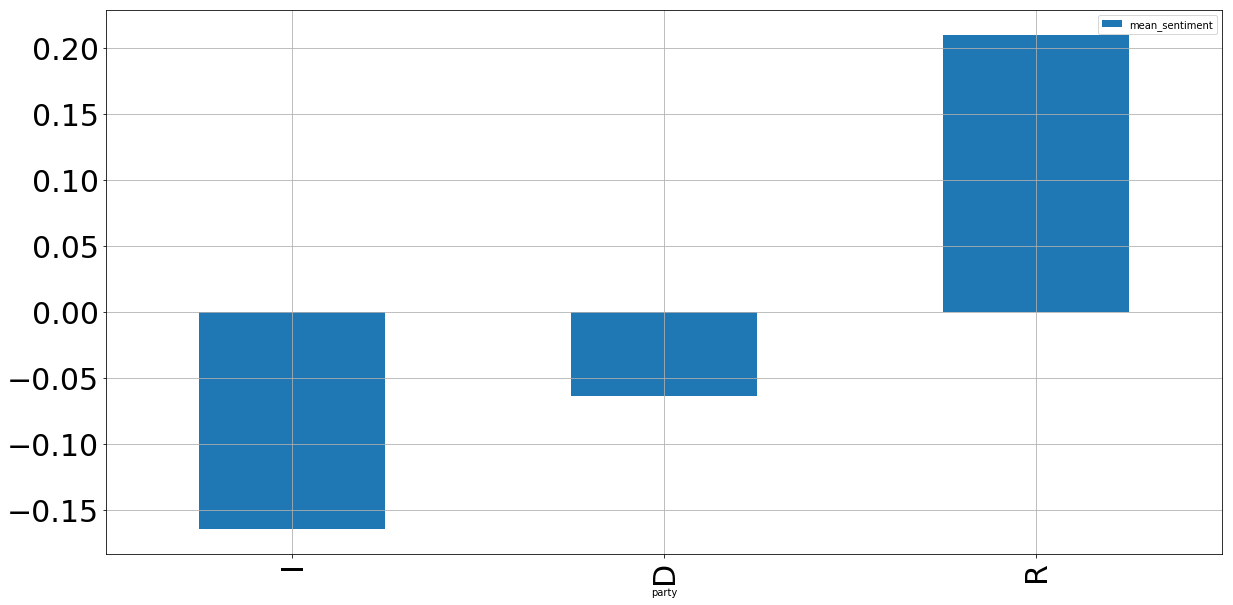

In [57]:
party_sentiment.plot(kind='bar', grid=True, figsize=(20,10), fontsize=30)

In [36]:
state_sentiment = pd.DataFrame(df.groupby('state').mean_sentiment.mean())

In [37]:
state_sentiment.sort_values('mean_sentiment', inplace=True)
state_sentiment.head()

,mean_sentiment
state,
HI,-0.182734
OR,-0.175527
VT,-0.107649
CT,-0.094427
VI,-0.086957


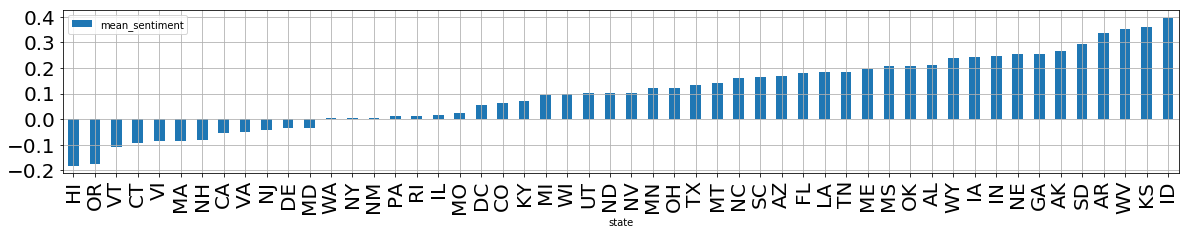

In [56]:
state = state_sentiment.plot(kind='bar', figsize=(20,3), grid=True, fontsize=20)

In [40]:
chamber_sentiment = pd.DataFrame(df.groupby('chamber').mean_sentiment.mean())

In [41]:
chamber_sentiment.sort_values('mean_sentiment', inplace=True)
chamber_sentiment.head()

,mean_sentiment
chamber,
joint,-0.128889
senate,-0.035323
house,0.081338


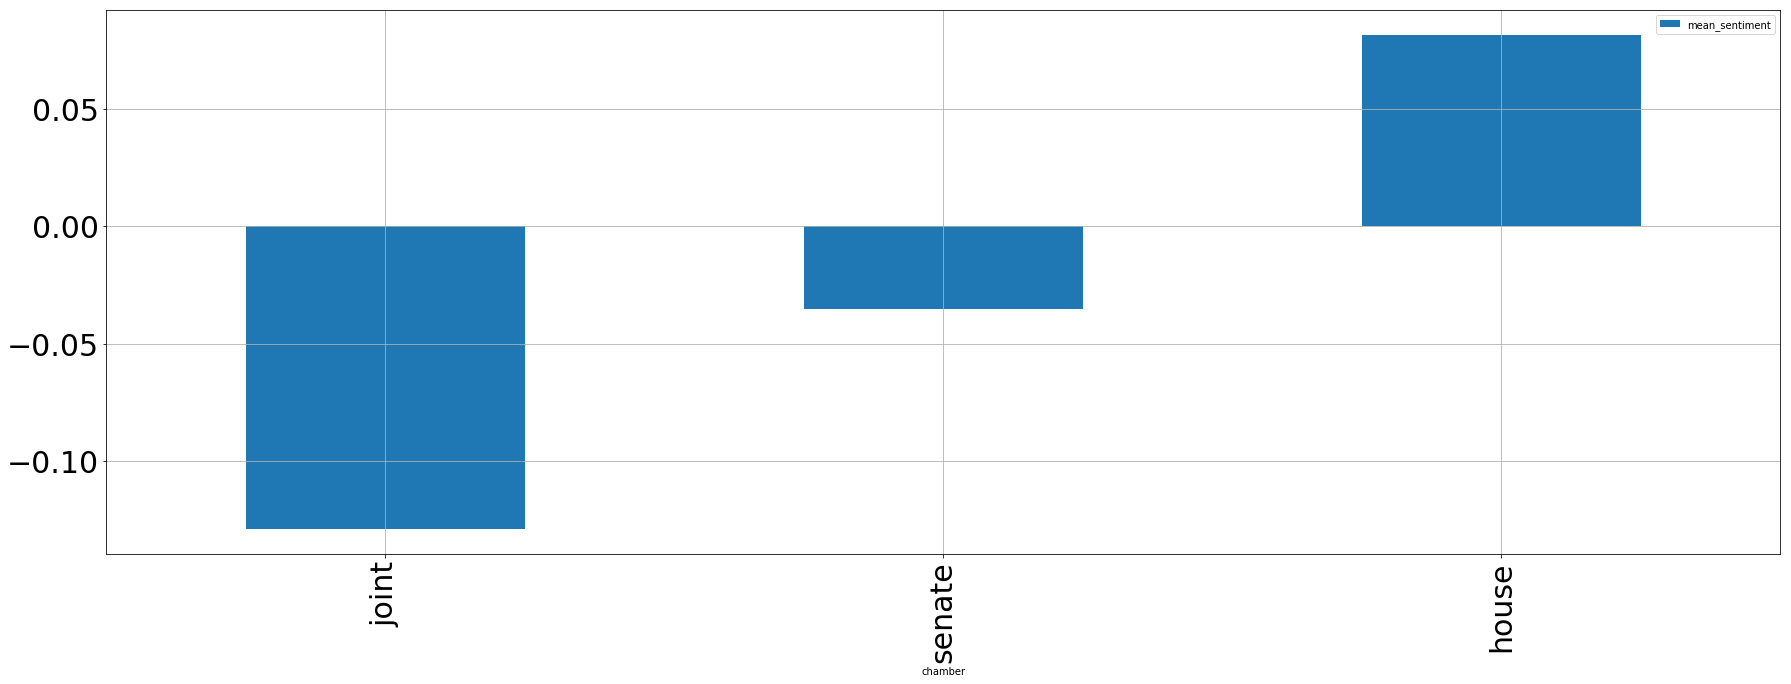

In [51]:
chamber_sentiment.plot(kind='bar', grid=True, figsize=(30,10), fontsize=30)

In [43]:
source_sentiment = pd.DataFrame(df.groupby('source').mean_sentiment.mean())

In [44]:
source_sentiment.sort_values('mean_sentiment', inplace=True)
source_sentiment.head()

,mean_sentiment
source,
Medium,-0.583333
HeyOrca,-0.458333
dlvr.it,-0.200000
Twitter for Windows,-0.142857
Twitter for BlackBerry®,-0.125000


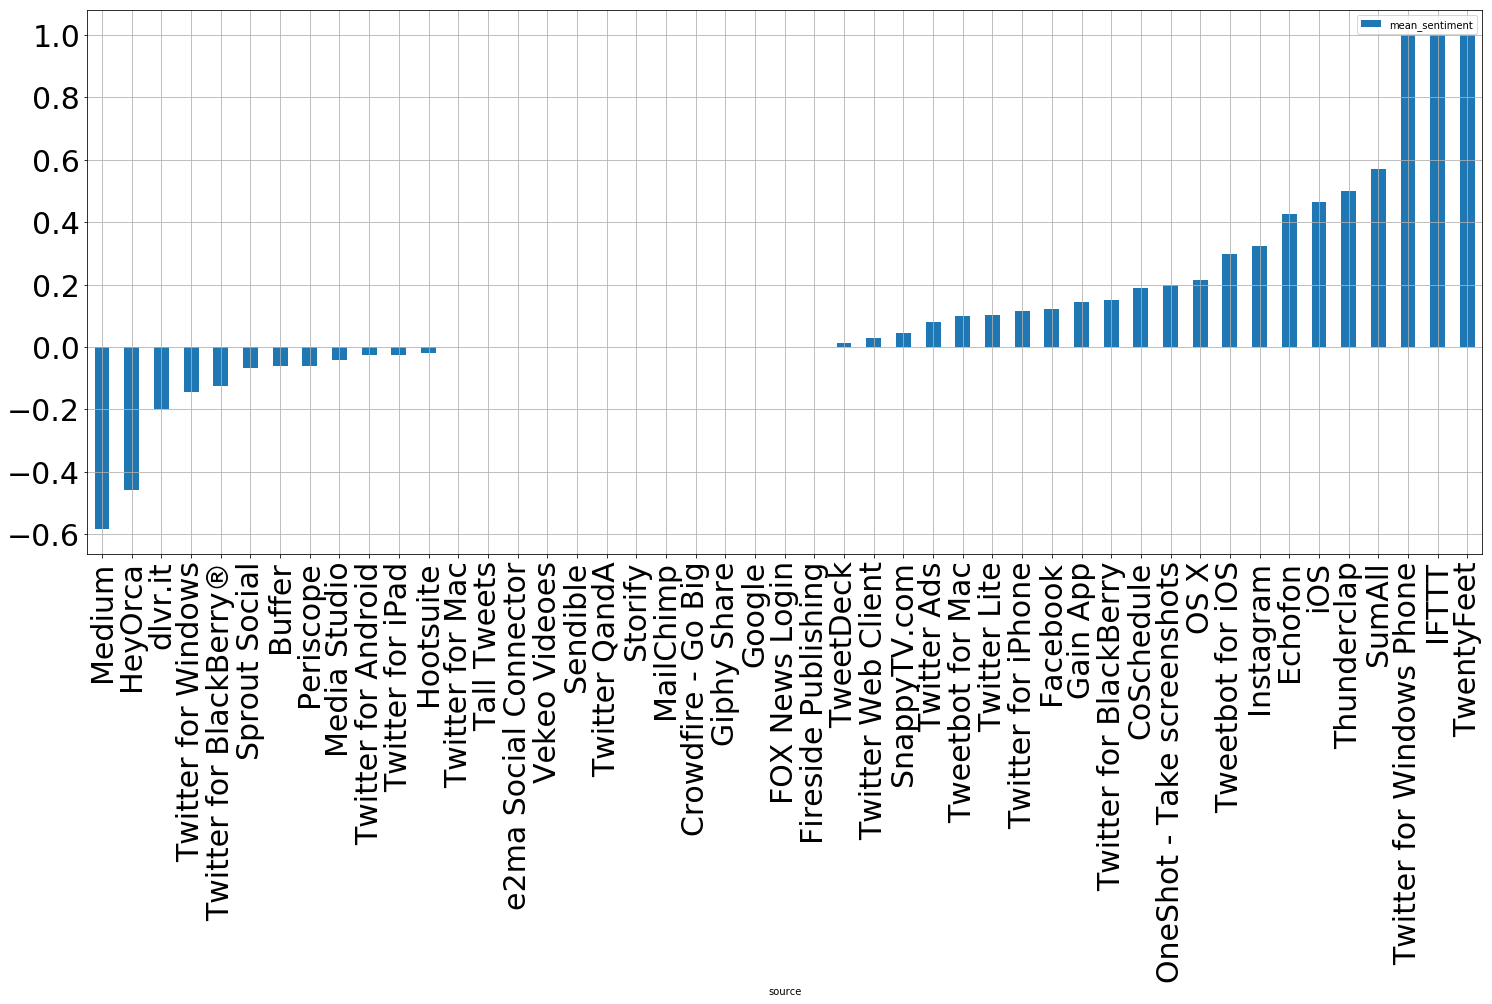

In [54]:
source_sentiment.plot(kind='bar', figsize=(25,10), grid=True, fontsize=30)

In [79]:
df.groupby('source').sentiment.value_counts()

source                     sentiment
Buffer                     2              739
                           1              142
                           3               82
CoSchedule                 2               26
                           3                6
Crowdfire - Go Big         2                5
Echofon                    3               55
                           2               51
                           1                7
FOX News Login             2                4
Facebook                   2              206
                           3               61
                           1               25
Fireside Publishing        2               22
                           1                1
                           3                1
Gain App                   2               20
                           3                6
                           1                2
Giphy Share                2                1
Google                     2               